In [13]:

# Load thư viện
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


# Đọc file csv
df = pd.read_csv("S2_DataFile(2).csv")
 
# Hiển thị 5 dòng đầu tiên
df.head(5)

,BRANCH_ID,CHANNEL_ID,AMOUNT,TRAN_TYPE,TRAN_TIME
0,BR0001,MOBILE,3020080,BOOKING ORDER,12/01/2019 1:11
1,BR0002,ATM,2001100,CASH TRANSACTIONS,12/01/2019 11:01
2,BR0004,MOBILE,2140140,BOOKING ORDER,12/01/2019 1:11
3,BR0002,INTERNET,4293000,FINANCIAL POSTING,12/01/2019 6:50
4,BR0003,MOBILE,3046430,BOOKING ORDER,12/01/2019 1:11


In [14]:
#Kiểm tra dữ liệu
print(df['TRAN_TYPE'].dtypes)

object


In [15]:
# Convert về dạng DateTime
df['TRAN_TIME'] = pd.to_datetime(df['TRAN_TIME'],format='%d/%m/%Y %H:%M')

# In kiểu dữ liệu
print(df['TRAN_TIME'].dtype)

datetime64[ns]


In [16]:
# Check tổng quan dữ liệu
print(df['AMOUNT'].describe())

count    5.000000e+02
mean     3.529194e+06
std      1.602360e+07
min     -2.000000e+06
25%      7.883650e+04
50%      1.002200e+06
75%      3.000000e+06
max      3.000000e+08
Name: AMOUNT, dtype: float64


In [17]:

# Tạo mask để lấy các bản ghi hợp lệ
mask = df['AMOUNT'] > 0
 
# Lấy các bản ghi không lỗi
df = df[mask]

In [18]:
print(df['AMOUNT'].describe())

count    4.980000e+02
mean     3.547383e+06
std      1.605310e+07
min      1.000000e+01
25%      8.418000e+04
50%      1.006600e+06
75%      3.000000e+06
max      3.000000e+08
Name: AMOUNT, dtype: float64


In [19]:

# Tạo cột giờ
df['TRAN_HOUR'] = df['TRAN_TIME'].dt.strftime('%H')
 
# Kiểm tra thử
print(df[['TRAN_HOUR','TRAN_TIME']])

    TRAN_HOUR           TRAN_TIME
0          01 2019-01-12 01:11:00
1          11 2019-01-12 11:01:00
2          01 2019-01-12 01:11:00
3          06 2019-01-12 06:50:00
4          01 2019-01-12 01:11:00
..        ...                 ...
495        08 2019-01-12 08:45:00
496        21 2019-04-11 21:13:00
497        10 2019-01-12 10:53:00
498        08 2019-01-12 08:58:00
499        09 2019-01-12 09:13:00

[498 rows x 2 columns]


In [23]:
#BIỂU ĐỒ 1. BIỂU ĐỒ PIE VỀ TỶ LỆ SÔ TIỀN GIAO DỊCH TRÊN CÁC KÊNH
# Thực hiện group by channel và tính tổng số tiền giao dịch
sum_AMT_byChannel = df.groupby(['CHANNEL_ID'])['AMOUNT'].sum().reset_index(name='SUM_AMT_BY_CHN')
print(sum_AMT_byChannel)
 
df_plot = sum_AMT_byChannel
df_plot = df_plot.set_index('CHANNEL_ID')
print(df_plot)
plot = df_plot.plot.pie(y='SUM_AMT_BY_CHN',subplots=True, figsize=(8, 8))
 
# TRANG TRÍ VÀ HIEN THI BIEU DO
plt.title("DOANH SỐ GIAO DỊCH THEO KÊNH")
plt.ylabel("")
plt.show()

KeyError: 'Column not found: AMOUNT'

  CHANNEL_ID  COUNTS
0        ATM      98
1   INTERNET      72
2     MOBILE     328
  CHANNEL_ID  SUM_AMT_BY_CHN  COUNTS
0        ATM       179502250      98
1   INTERNET       768629241      72
2     MOBILE       818465352     328
            SUM_AMT_BY_CHN  COUNTS
CHANNEL_ID                        
ATM              179502250      98
INTERNET         768629241      72
MOBILE           818465352     328
            SUM_AMT_BY_CHN  COUNTS   %_DOANHSO   %_SOLUONG
CHANNEL_ID                                                
ATM              179502250      98   21.931564   29.878049
INTERNET         768629241      72   93.911030   21.951220
MOBILE           818465352     328  100.000000  100.000000


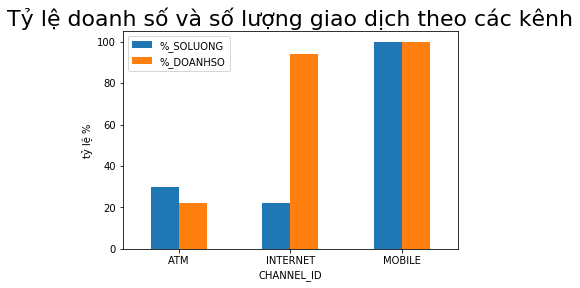

In [21]:
#BIỂU ĐỒ 2. BIỂU ĐỒ CỘT VỀ SỐ LƯỢNG VÀ DOANH SỐ GIAO DỊCH THEO KÊNH
# 8. VE BIEU DO DANH DOANH SO VA SO LUONG GIAO DICH TREN CAC KENH GIAO DICH
count_byChannel = df.groupby(['CHANNEL_ID']).size().reset_index(name='COUNTS')
print(count_byChannel)
df_plot2 = sum_AMT_byChannel.merge(count_byChannel, on=['CHANNEL_ID'])
print(df_plot2)
df_plot2 = df_plot2.set_index('CHANNEL_ID')
print(df_plot2)
 
# Quy đổi dữ liệu Doanh số về phần trăm để biểu diễn tính tương quan của dữ liệu
max_amt = df_plot2['SUM_AMT_BY_CHN'].max()
df_plot2['%_DOANHSO'] =df_plot2['SUM_AMT_BY_CHN']*100/max_amt
# Quy đổi dữ liệu Số lượng giao dịch về phần trăm để biểu diễn tính tương quan của dữ liệu
max_count = df_plot2['COUNTS'].max()
df_plot2['%_SOLUONG'] = df_plot2['COUNTS'] * 100 / max_count
print(df_plot2)
 
df_plot2.plot.bar( y=['%_SOLUONG','%_DOANHSO'])
plt.title("Tỷ lệ doanh số và số lượng giao dịch theo các kênh", fontsize=22)
plt.ylabel('tỷ lệ %')
plt.xticks(rotation=0)
 
plt.show()

89


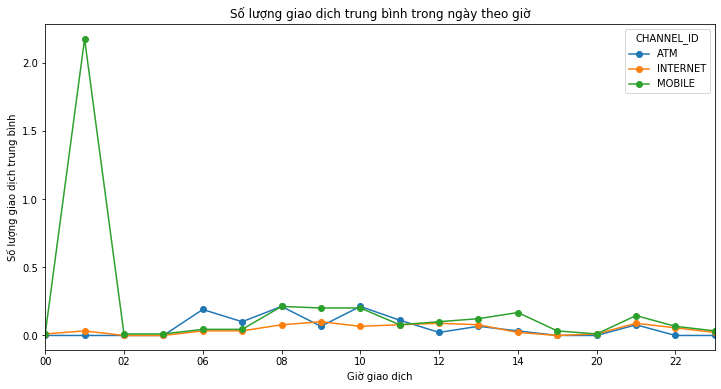

In [22]:
#BIỂU ĐỒ 3. SỐ LIỆU GIAO DỊCH TRUNG BÌNH TRONG TỪNG GIỜ TRONG NGÀY
# 9. VE BIEU DO LUU LUONG GIAO DICH CÁC KENH TRUNG BINH THEO GIO MOI NGAY
# Tính số ngày trong dữ liệu
number_of_days = (df['TRAN_TIME'].max().date() - df['TRAN_TIME'].min().date()).days
print(number_of_days)
 
# Trích ra 2 cột kênh và giờ
df = df[['CHANNEL_ID', 'TRAN_HOUR']]

# Group và tính số lượng từng kênh trong từng giờ
count_by_CNNTime = df.groupby(['CHANNEL_ID','TRAN_HOUR']).size().reset_index(name='COUNTS_CNNTIME')

# Áp dung pivot table để xoay dữ liệu
df_plot3 = pd.pivot_table(count_by_CNNTime, values='COUNTS_CNNTIME', index=['TRAN_HOUR'], columns=['CHANNEL_ID'])

# Xử lý NaN
df_plot3['ATM'] = df_plot3['ATM'].fillna(0)
df_plot3['INTERNET'] = df_plot3['INTERNET'].fillna(0)
df_plot3['MOBILE'] = df_plot3['MOBILE'].fillna(0)

# Tính giá trị trung bình theo ngày
df_plot3['ATM']  = df_plot3['ATM'] / number_of_days
df_plot3['INTERNET'] = df_plot3['INTERNET'] / number_of_days
df_plot3['MOBILE'] = df_plot3['MOBILE'] / number_of_days

# Vẽ biểu đồ
df_plot3.plot(y=['ATM', 'INTERNET', 'MOBILE'], figsize=(12, 6),marker='o')
plt.title('Số lượng giao dịch trung bình trong ngày theo giờ')
plt.ylabel('Số lượng giao dịch trung bình')
plt.xlabel('Giờ giao dịch')
 
plt.show()